<a href="https://colab.research.google.com/github/RyanRobles/Robles-COSC110/blob/main/lab2_titanic_robles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laboratory Exercise: Basic Data Cleaning and Visualization fo Titanic Dataset**

Step 1: Load the Data

In [54]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Step 2:** Understand the Data

In [55]:
df.info()
df.describe()
# should be df.columns() but I get error "'Index' object is not callable"
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**Step 3:** Check for Missing Values

In [56]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Step 4:** Handle Missing Values

In [58]:
#Fill Age with Median
df["Age"].fillna(df["Age"].median(), inplace= True)

#Drop Cabin Column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)

<ipython-input-58-03ef56a97415>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace= True)


**Step 5:** Remove Duplicates

In [59]:
#Check for Duplicates
df.duplicated().sum()
#Remove duplicates
df.drop_duplicates(inplace=True)

**Step 6:** Fix Data Types

In [60]:
#Convert Survived and Pclass to Categorical
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

**Step 7:** Standardized Column Names

In [61]:
#Convert all column names to lowercase
df.columns = df.columns.str.lower()

**Step 8:** Save the Cleaned Dataset

In [62]:
df.to_csv("titanic_cleaned.csv", index=False)

**Basic Data Visualizations**

In [63]:
#import matplotlib.pylot as plt
import matplotlib.pyplot as plt

**Bar Plot of Survival Count**

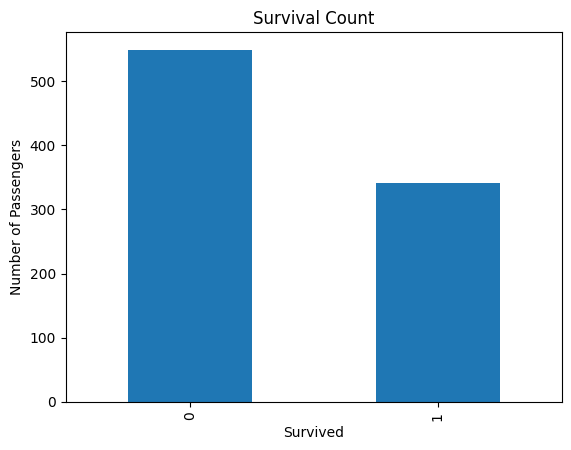

In [64]:
df["survived"].value_counts().plot(kind='bar')
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

**Historgram of Age Distribution**

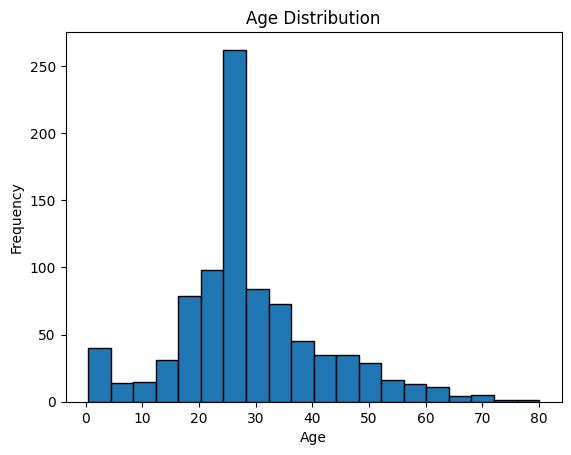

In [65]:
df["age"].plot(kind='hist', bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

**Survival by Gender**

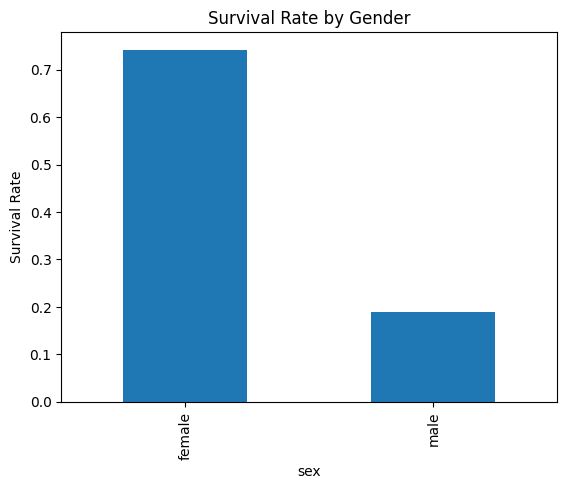

In [66]:
df.columns = df.columns.str.lower()
df["survived"] = pd.to_numeric(df["survived"]) # This code converts it from cateogircal to integer for calculations to work properly.
df.groupby("sex")["survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

**Q1: What are your steps in cleaning the dataset? Why did ytou choose the algorithm that you used in cleaning the dataset?**

**Algorithm:**
- **Handling the missing values** in the dataset by filling the missing values in 'Age' using the median age to avoid bias, and 'Embarked' column with the mode (most common value in the data). Dropping the 'Cabin' column because the missing values are greater than the present values.
- **Removing Duplicates** to ensure accuracy.
- **Fixing Data Types** in (Survived, Pclass) to categorical to improve analysis.
- **Lowering the Column names** for consistency using the .str.lower() function

The method used keeps the data that are needed and ensuring the accuracy at the same time by filling the missing values (Embarked, Age) and also dropping the unwanted values (Cabin) as it will lessen the accuracy due to most data are missing.

**Q2: Create at least two (2) basic data analysis on two (2) columns in the dataset. Be creative and critical in deriving the insights on the data. You can show the visualization used to derive the insights.**


**Analysis 1:**
- Passengers who paid higher fares had a greater chance of surivival than the passengers who paid lower fare rates.


<ipython-input-67-1ecf3ab3aad4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Fare_category")["survived"].mean().plot(kind="bar", color=["red", "orange", "yellow", "green"])


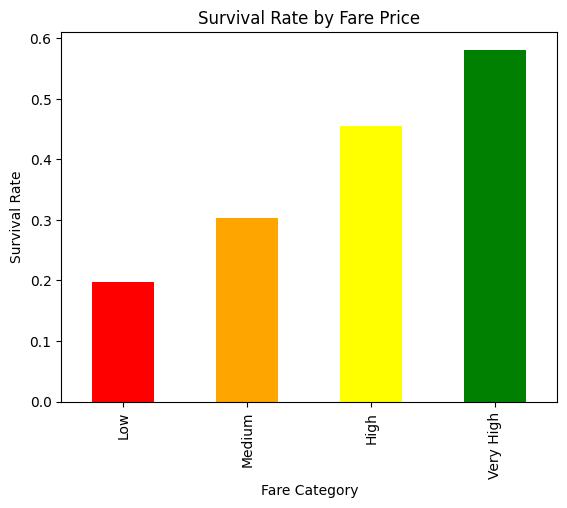

In [67]:
df["Fare_category"] = pd.qcut(df["fare"], 4, labels=["Low", "Medium", "High", "Very High"])
df.groupby("Fare_category")["survived"].mean().plot(kind="bar", color=["red", "orange", "yellow", "green"])
plt.title("Survival Rate by Fare Price")
plt.xlabel("Fare Category")
plt.ylabel("Survival Rate")
plt.show()

**Analysis 2:**
Passengers with family sizes between 2-4 members had better survival rates than passengers with larger quantity. This data shows that larger family sizes had difficulties escaping together.

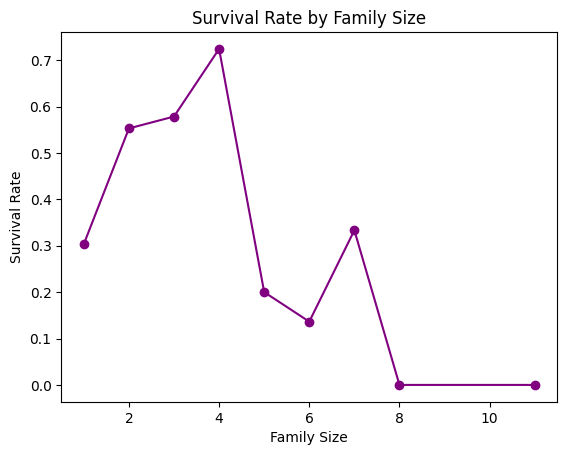

In [ ]:
df["family_size"] = df["SibSp"] + df["Parch"] + 1  # Including the passenger
df.groupby("family_size")["Survived"].mean().plot(kind="line", marker="o", color="purple")
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()

**"This activity was completed with assistance from ChatGPT, an AI language model developed by OpenAI"**

OpenAI. (2025). ChatGPT (March 16 Version) [Language model]. Retrieved from https://openai.com/chatgpt
